Converting PDF /Users/aruniga.baskaran/Downloads/Mixed Multipage Document.pdf to images...
Number of pages in PDF: 7
Detected 2 face(s)
This is a KYC Document.


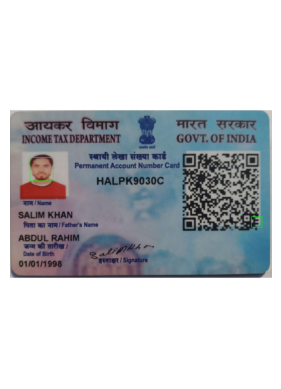

Page 1 - Document Type: KYC Document
Detected 1 face(s)
This is a KYC Document.


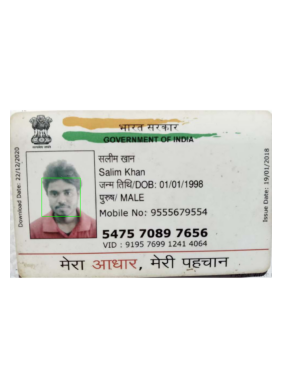

Page 2 - Document Type: KYC Document
Detected 0 face(s)
This is a Non-KYC Document.


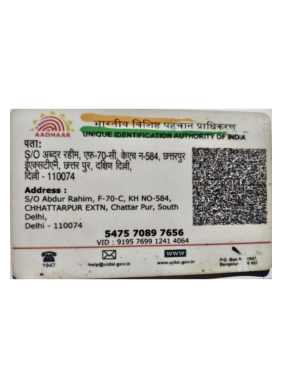

Page 3 - Document Type: Non-KYC Document
Detected 1 face(s)
This is a KYC Document.


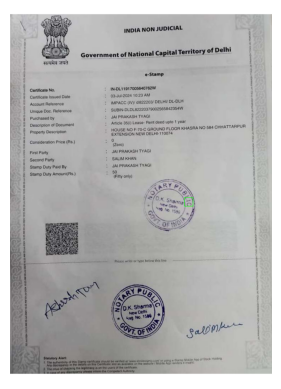

Page 4 - Document Type: KYC Document
Detected 1 face(s)
This is a KYC Document.


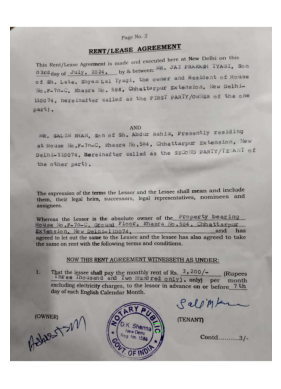

Page 5 - Document Type: KYC Document
Detected 1 face(s)
This is a KYC Document.


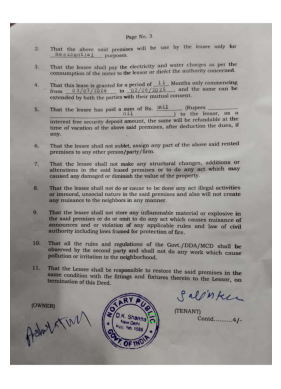

Page 6 - Document Type: KYC Document
Detected 0 face(s)
This is a Non-KYC Document.


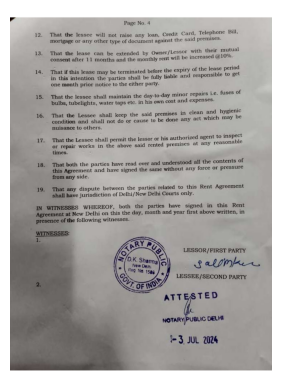

Page 7 - Document Type: Non-KYC Document


In [11]:
import cv2
import numpy as np
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Function to detect faces in an image
def detect_faces(image):
    # Load Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    
    # Convert to grayscale (Haar Cascade requires grayscale images)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    print(f"Detected {len(faces)} face(s)")
    
    # Draw bounding boxes around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Green rectangle
    
    return faces, image

# Function to classify document as KYC or Non-KYC based on face detection
def classify_document(image):
    faces, detected_image = detect_faces(image)
    
    if len(faces) > 0:
        # If faces are detected, classify as "KYC Document"
        print("This is a KYC Document.")
        document_type = "KYC Document"
    else:
        # If no faces are detected, classify as "Non-KYC"
        print("This is a Non-KYC Document.")
        document_type = "Non-KYC Document"
    
    # Display the image with detected faces
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for display
    plt.axis('off')  # Turn off axis labels
    plt.show()

    return document_type

# Function to process PDF pages and classify each one
def process_pdf(pdf_path):
    # Convert PDF to images
    print(f"Converting PDF {pdf_path} to images...")
    images = convert_from_path(pdf_path)
    
    if not images:
        print("Error: Unable to convert PDF to images.")
        return
    
    print(f"Number of pages in PDF: {len(images)}")
    
    # Process each page
    for page_number, page in enumerate(images):
        # Convert PIL image to OpenCV format (BGR)
        image = cv2.cvtColor(np.array(page), cv2.COLOR_RGB2BGR)
        
        # Classify the document based on face detection
        document_type = classify_document(image)
        print(f"Page {page_number + 1} - Document Type: {document_type}")

# Main function to load the PDF and classify documents
def main():
    # Path to the input PDF
    pdf_path = "/Users/aruniga.baskaran/Downloads/Mixed Multipage Document.pdf"  # Replace with the correct path to your PDF file

    # Process the PDF for face detection and document classification
    process_pdf(pdf_path)

if __name__ == "__main__":
    main()


In [ ]:
## yolo

In [15]:
import cv2
import torch
import numpy as np
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Use the small version of YOLOv5 for face detection

# Function to detect faces in an image using YOLOv5
def detect_faces_yolo(image):
    # Use YOLOv5 to perform inference on the image
    results = model(image)
    
    # Extract detected faces
    faces = []
    for *xyxy, conf, cls in results.xywh[0]:  # xyxy is the bounding box coordinates (x1, y1, x2, y2)
        if cls == 0:  # Class 0 is for 'person' in COCO dataset (which includes faces)
            x1, y1, x2, y2 = map(int, xyxy)
            faces.append((x1, y1, x2, y2))
            # Draw bounding box around the face
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box
    
    return faces, image

# Function to classify document as KYC or Non-KYC based on face detection
def classify_document(image):
    faces, detected_image = detect_faces_yolo(image)
    
    if len(faces) > 0:
        # If faces are detected, classify as "KYC Document"
        print("This is a KYC Document.")
        document_type = "KYC Document"
    else:
        # If no faces are detected, classify as "Non-KYC"
        print("This is a Non-KYC Document.")
        document_type = "Non-KYC Document"
    
    # Display the image with detected faces
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for display
    plt.axis('off')  # Turn off axis labels
    plt.show()

    return document_type

# Function to process PDF pages and classify each one
def process_pdf(pdf_path):
    # Convert PDF to images
    print(f"Converting PDF {pdf_path} to images...")
    images = convert_from_path(pdf_path)
    
    if not images:
        print("Error: Unable to convert PDF to images.")
        return
    
    print(f"Number of pages in PDF: {len(images)}")
    
    # Process each page
    for page_number, page in enumerate(images):
        # Convert PIL image to OpenCV format (BGR)
        image = cv2.cvtColor(np.array(page), cv2.COLOR_RGB2BGR)
        
        # Classify the document based on face detection
        document_type = classify_document(image)
        print(f"Page {page_number + 1} - Document Type: {document_type}")

# Main function to load the PDF and classify documents
def main():
    # Path to the input PDF
    pdf_path = "/Users/aruniga.baskaran/Downloads/Mixed Multipage Document.pdf"  # Replace with the correct path to your PDF file

    # Process the PDF for face detection and document classification
    process_pdf(pdf_path)

if __name__ == "__main__":
    main()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/aruniga.baskaran/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Using cache found in /Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-9 Python-3.12.7 torch-2.5.1 CPU

100%|██████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 7.80MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Converting PDF /Users/aruniga.baskaran/Downloads/Mixed Multipage Document.pdf to images...
Number of pages in PDF: 7
This is a Non-KYC Document.
Page 1 - Document Type: Non-KYC Document


/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


This is a KYC Document.
Page 2 - Document Type: KYC Document
This is a Non-KYC Document.
Page 3 - Document Type: Non-KYC Document


/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


This is a Non-KYC Document.
Page 4 - Document Type: Non-KYC Document
This is a Non-KYC Document.
Page 5 - Document Type: Non-KYC Document


/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


This is a Non-KYC Document.
Page 6 - Document Type: Non-KYC Document
This is a Non-KYC Document.
Page 7 - Document Type: Non-KYC Document


/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [14]:
!pip install ultralytics



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [16]:
import cv2
import torch
import numpy as np
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Load YOLOv5 model (use 'yolov5s' for a small, fast model)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is smaller and faster for real-time inference

# Function to detect faces in an image using YOLOv5
def detect_faces_yolo(image):
    # Perform inference using YOLOv5
    results = model(image)
    
    # Extract detected faces (class 0 corresponds to 'person' in YOLOv5)
    faces = []
    for *xyxy, conf, cls in results.xywh[0]:  # xyxy gives bounding box coordinates (x1, y1, x2, y2)
        if cls == 0:  # Class 0 corresponds to 'person' in the COCO dataset (which includes faces)
            x1, y1, x2, y2 = map(int, xyxy)
            faces.append((x1, y1, x2, y2))
            # Draw bounding boxes around faces
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box
    
    return faces, image

# Function to classify document as KYC or Non-KYC based on face detection
def classify_document(image):
    faces, detected_image = detect_faces_yolo(image)
    
    if len(faces) > 0:
        print("This is a KYC Document.")
        document_type = "KYC Document"
    else:
        print("This is a Non-KYC Document.")
        document_type = "Non-KYC Document"
    
    # Display the image with detected faces
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for proper display
    plt.axis('off')  # Turn off axis labels
    plt.show()

    return document_type

# Function to process PDF pages and classify each one
def process_pdf(pdf_path):
    # Convert PDF to images
    print(f"Converting PDF {pdf_path} to images...")
    images = convert_from_path(pdf_path)
    
    if not images:
        print("Error: Unable to convert PDF to images.")
        return
    
    print(f"Number of pages in PDF: {len(images)}")
    
    # Process each page
    for page_number, page in enumerate(images):
        # Convert PIL image to OpenCV format (BGR)
        image = cv2.cvtColor(np.array(page), cv2.COLOR_RGB2BGR)
        
        # Classify the document based on face detection
        document_type = classify_document(image)
        print(f"Page {page_number + 1} - Document Type: {document_type}")

# Main function to load the PDF and classify documents
def main():
    # Path to the input PDF
    pdf_path = "/Users/aruniga.baskaran/Downloads/Mixed Multipage Document.pdf"  # Replace with the correct path to your PDF file

    # Process the PDF for face detection and document classification
    process_pdf(pdf_path)

if __name__ == "__main__":
    main()


Using cache found in /Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-9 Python-3.12.7 torch-2.5.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Converting PDF /Users/aruniga.baskaran/Downloads/Mixed Multipage Document.pdf to images...
Number of pages in PDF: 7
This is a Non-KYC Document.
Page 1 - Document Type: Non-KYC Document


/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


This is a KYC Document.
Page 2 - Document Type: KYC Document
This is a Non-KYC Document.
Page 3 - Document Type: Non-KYC Document


/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


This is a Non-KYC Document.
Page 4 - Document Type: Non-KYC Document
This is a Non-KYC Document.
Page 5 - Document Type: Non-KYC Document


/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


This is a Non-KYC Document.
Page 6 - Document Type: Non-KYC Document
This is a Non-KYC Document.
Page 7 - Document Type: Non-KYC Document


/Users/aruniga.baskaran/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [44]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO("yolo11n.pt")  # Replace with the path to your YOLO model

# Run inference with the YOLO model on the given image
image_path = "/Users/aruniga.baskaran/Downloads/sample aadhaar masking.png"  # Replace with your image path
results = model(image_path)
results[0].show()


image 1/1 /Users/aruniga.baskaran/Downloads/sample aadhaar masking.png: 640x640 1 person, 104.9ms
Speed: 2.6ms preprocess, 104.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
